In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [2]:
df = pd.read_csv('../Data/ts_demo.csv')
df.head()

,Date,Value
0,1-Jan,16.740344
1,1-Feb,23.871524
2,1-Mar,28.731649
3,1-Apr,33.594409
4,1-May,32.651929


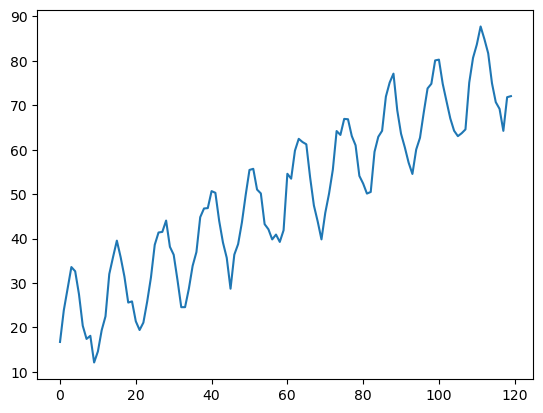

In [3]:
plt.plot(df['Value'])

In [9]:
model = pm.auto_arima(df['Value'], seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=707.977, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=646.265, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=679.122, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=707.156, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=684.128, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=677.120, Time=0.28 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=652.615, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=645.348, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=684.302, Time=0.07 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=

In [13]:
model = sm.tsa.ARIMA(df['Value'], order=(4, 1, 2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  120
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -280.217
Date:                Wed, 31 Jul 2024   AIC                            574.434
Time:                        14:31:28   BIC                            593.887
Sample:                             0   HQIC                           582.333
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2646      0.102     12.449      0.000       1.066       1.464
ar.L2         -0.4133      0.168     -2.467      0.014      -0.742      -0.085
ar.L3         -0.0837      0.183     -0.456      0.6

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [31]:
x = len(df)
forecast = results.predict(start=len(df), end=len(df)+12)

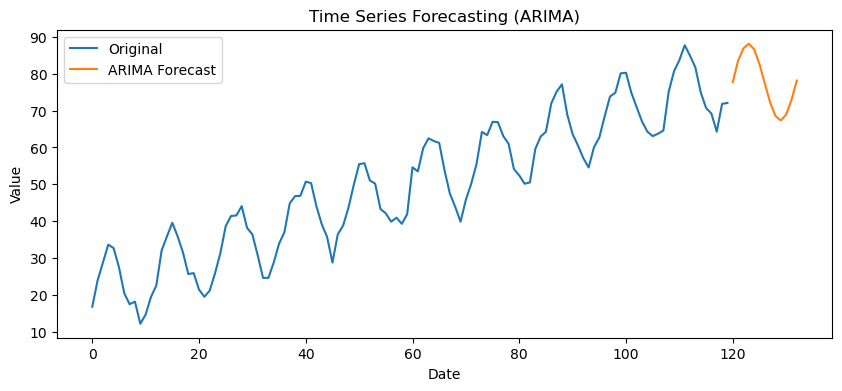

In [33]:
#Plot the original data and the forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast, label='ARIMA Forecast')
plt.title('Time Series Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()